<a href="https://colab.research.google.com/github/splendie/dicoding-ml/blob/main/Membuat_Model_NLP_dengan_Tensorflow_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Indri Yunita
Domicile: Jakarta

This project is an implementation of NLP model with Tensorflow for detecting sarcasm in news headline. Sarcasm is the use of irony to mock something or someone, often in a humorous way.

The data is taken from [Kaggle](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection). This is a binary classification task, with 2 outputs: Sarcastic or Not Sarcastic.


In [6]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
df = pd.read_json("Sarcasm_Headlines_Dataset.json", orient="records")
df.head()


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
df = df.drop(columns=['article_link'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [9]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(sentences):
    # Convert text to lowercase
    text = sentences.lower()
    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split()
                     if word not in stopwords])
    return text

print(df['headline'].iloc[1])
clean_text(df['headline'].iloc[1])

the 'roseanne' revival catches up to our thorny political mood, for better and worse


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'roseanne revival catches thorny political mood better worse'

In [10]:
df['cleaned_headline']=df['headline'].map(clean_text)

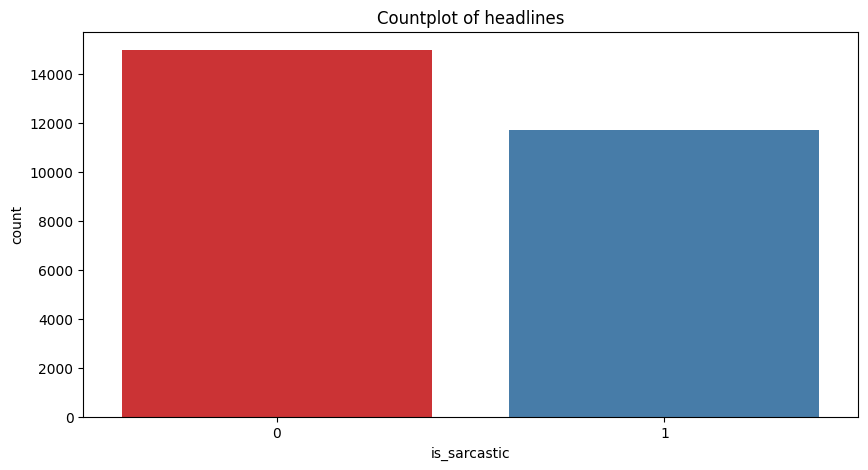

In [11]:
headline = df['cleaned_headline'].values
y = df['is_sarcastic'].values

# Check data distribution between not sarcastic and sarcastic data points
plt.figure(figsize=(10, 5))
sns.countplot(x='is_sarcastic', data=df, palette="Set1").set_title("Countplot of headlines")
plt.show()


In [12]:
# Split data into train and test
headline_train, headline_test, y_train, y_test = train_test_split(headline, y, test_size=0.2)


In [13]:
NUM_WORDS = 5000 # Parameter indicating the number of words we'll put in the dictionary
MAX_LEN = 30 # Maximum number of words in a squence

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token='-')
tokenizer.fit_on_texts(headline_train)
tokenizer.fit_on_texts(headline_test)

seq_train = tokenizer.texts_to_sequences(headline_train)
seq_test = tokenizer.texts_to_sequences(headline_test)

seq_train[:10]

[[2528, 1156, 344, 1, 1228, 1994],
 [1033, 103, 1],
 [4, 217, 4015, 3655, 1995, 73, 1],
 [824, 3119, 1, 33, 193, 1, 9, 17, 1],
 [1, 1184, 790, 557, 1726, 763, 240],
 [1, 1, 1, 28, 6, 291, 13],
 [3656, 693, 3383, 48, 13],
 [4442, 4953, 4954, 1, 693, 2904, 902, 764, 1],
 [3, 10, 535, 2905, 903, 259, 1328],
 [4016, 1, 1157, 2096, 655, 4443, 4955, 642]]

In [14]:
padded_train = pad_sequences(seq_train, maxlen=30, padding='post')
padded_test = pad_sequences(seq_test, maxlen=30, padding='post')

padded_train[0:10]

array([[2528, 1156,  344,    1, 1228, 1994,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [1033,  103,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   4,  217, 4015, 3655, 1995,   73,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [ 824, 3119,    1,   33,  193,    1,    9,   17,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   1, 1184,  790,  557, 1726,  763,  240,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(NUM_WORDS, 16, input_length=MAX_LEN),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
class stop_training_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if logs['val_accuracy'] >= 0.90 :
      print('Training stopped')
      self.model.stop_training = True

In [22]:
num_epochs = 30

history = model.fit(padded_train,
                    y_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, y_test),
                    verbose=2,
                    callbacks = [stop_training_callback()])

Epoch 1/30
668/668 - 14s - loss: 0.5773 - accuracy: 0.6798 - val_loss: 0.5066 - val_accuracy: 0.7525 - 14s/epoch - 21ms/step
Epoch 2/30
668/668 - 11s - loss: 0.3959 - accuracy: 0.8265 - val_loss: 0.4583 - val_accuracy: 0.7834 - 11s/epoch - 16ms/step
Epoch 3/30
668/668 - 12s - loss: 0.3510 - accuracy: 0.8476 - val_loss: 0.4428 - val_accuracy: 0.7922 - 12s/epoch - 18ms/step
Epoch 4/30
668/668 - 11s - loss: 0.3306 - accuracy: 0.8590 - val_loss: 0.4588 - val_accuracy: 0.7849 - 11s/epoch - 17ms/step
Epoch 5/30
668/668 - 11s - loss: 0.3062 - accuracy: 0.8647 - val_loss: 0.5004 - val_accuracy: 0.7834 - 11s/epoch - 17ms/step
Epoch 6/30
668/668 - 11s - loss: 0.2757 - accuracy: 0.8743 - val_loss: 0.6171 - val_accuracy: 0.7881 - 11s/epoch - 17ms/step
Epoch 7/30
668/668 - 12s - loss: 0.2496 - accuracy: 0.8789 - val_loss: 0.6960 - val_accuracy: 0.7789 - 12s/epoch - 18ms/step
Epoch 8/30
668/668 - 11s - loss: 0.2249 - accuracy: 0.8890 - val_loss: 0.6417 - val_accuracy: 0.7793 - 11s/epoch - 17ms/step


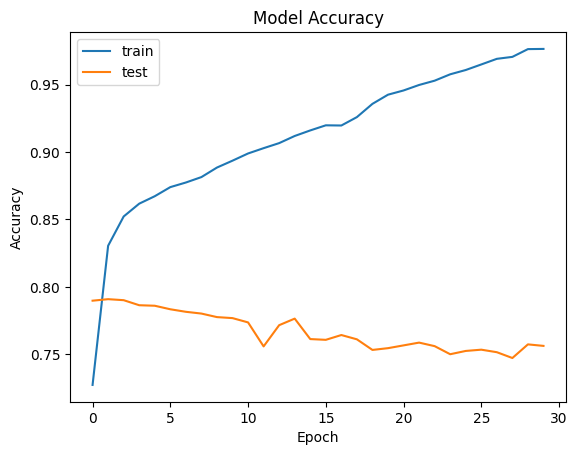

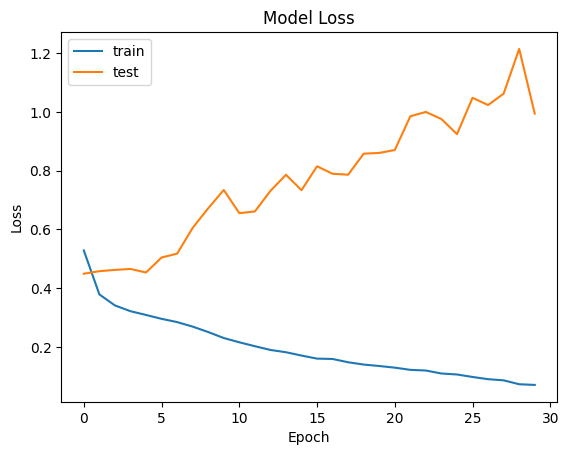

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()